<a href="https://colab.research.google.com/github/LearnerLNew/DataMiningNVisualization/blob/main/Missing_values%2C_normalisation%2C_classifier_evaluation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Missing values, normalisation, classifier evaluation

## Exercise 1

Given dataset (as an Numpy array) that contains  records about 50 persons: (Gender, Height, Weight, Index).
- Gender = 0 (Male); 1 (Female) (binary)
- Height = person's height in cm (integer)
- Weight = person's weight in kg (integer)
- Index = 0 - Extremely Weak; 1 - Weak; 2 - Normal; 3 - Overweight; 4 - Obesity; 5 - Extreme Obesity (integer from 0 to 5)

In [2]:
dataset = np.array([[0, 174, -1, 4], [0, 189, 87, 2], [1, 185, 110, 4], [1, 195, 104, 3], [0, 149, 61, 3], [0, 1893, 104, 3], [0, 147, 92, 5], [0, 154, 111, 5], [0, 174, 2, 3], [10, 169, 103, 4], [0, 195, 81, 2], [-1, 159, 80, 4], [1, 192, 101, 3], [0, 155, 51, 2], [0, 191, 379, 2], [1, 4, 107, 5], [1, 157, 110, 5], [0, 140, 129, 5], [0, 144, 145, 5], [0, 172, 139, -5], [0, 157, 110, 5], [1, 153, 149, 5], [1, 169, 97, 4], [0, 185, 139, 5], [1, 172, 67, 2], [1, 151, 64, 3], [0, 190, 95, 3], [0, 187, 62, 1], [1, 163, 159, 5], [0, 179, 152, 5], [0, 153, 121, 5], [0, 178, 52, 1], [1, 195, 65, 1], [1, 160, 131, 5], [1, 157, 153, 5], [1, 189, 132, 4], [1, 197, 114, 3], [0, 144, 80, 4], [1, 171, 152, 5], [1, 185, 81, 2], [1, 175, 120, 4], [1, 149, 108, 5], [0, 157, 56, 2], [0, 161, 118, 5], [1, 182, 126, 4], [0, 185, 76, 2], [1, 188, 122, 4], [0, 181, 111, 4], [0, 161, 72, 3], [0, 140, 152, 5]])

1. Output the records with noisy data, i.e., records where values of some features are most likely incorrect (you can assume that Height should be in the range $[50,220]$, and Weight in the range $[50, 160]$)

In [19]:
np.shape(dataset)
np.reshape(dataset, np.shape(dataset))
# print(dataset)
# x[(x != y[:,None,:]).all(axis=(0,-1))]
noisy_data = dataset[(dataset[:,0]<0) | (dataset[:,0]>1) | (dataset[:,1]<50) | (dataset[:,1]>220) | (dataset[:,2]<50) | (dataset[:,2]>160)| (dataset[:,3]<0) | (dataset[:,3]>5)]
print(noisy_data)

[[   0  174   -1    4]
 [   0 1893  104    3]
 [   0  174    2    3]
 [  10  169  103    4]
 [  -1  159   80    4]
 [   0  191  379    2]
 [   1    4  107    5]
 [   0  172  139   -5]]


2. Create a new dataset where noisy records (those that were identified as noisy in the previous step) are removed

In [20]:
selected_rows = dataset[(dataset[:,0]>=0) & (dataset[:,0]<=1)& (dataset[:,1]>=50) & (dataset[:,1]<220) & (dataset[:,2]>=50) & (dataset[:,2]<160) & (dataset[:,3]>=0) & (dataset[:,3]<=5)]
# print(selected_rows)

# selected_rows = np.ma.compress(dataset, noisy_data)
# np.delete(dataset, noisy_data)
# np.where(noisy_data, dataset)
print(selected_rows)

ValueError: ignored

3. In the cleaned dataset, compute the means (i.e., average) of Height and Weight features (rounded to the nearest integer)

In [23]:
np.shape(selected_rows)
flattenedMean = np.mean(selected_rows, axis=(0))
#axis=0-> columns, 1-> rows
# print(flattenedMean)

heightMean = selected_rows[:,1].mean()
print(int(heightMean))
print(heightMean.round())

weightMean = selected_rows[:,2].mean()
print(weightMean)
print(weightMean.round())

169.42857142857142


AttributeError: ignored

4. Plot the data points from the cleaned dataset: For every record, plot the point with coordinates (Height, Weight), i.e. Height is along the X-axis and Weight is along the Y-axis. Use different colors/shapes of points for records with different value of Index. Can you see separation between the classes of objects with different values of Index?

[189, 185, 195, 149, 147, 154, 195, 192, 155, 157, 140, 144, 157, 153, 169, 185, 172, 151, 190, 187, 163, 179, 153, 178, 195, 160, 157, 189, 197, 144, 171, 185, 175, 149, 157, 161, 182, 185, 188, 181, 161, 140]
[87, 110, 104, 61, 92, 111, 81, 101, 51, 110, 129, 145, 110, 149, 97, 139, 67, 64, 95, 62, 159, 152, 121, 52, 65, 131, 153, 132, 114, 80, 152, 81, 120, 108, 56, 118, 126, 76, 122, 111, 72, 152]


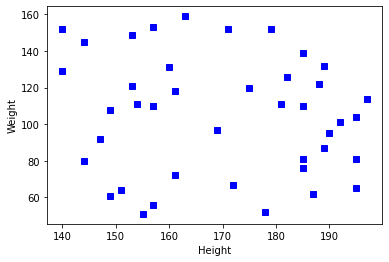

In [27]:
import matplotlib.pyplot as plt

np.shape(selected_rows)
height = list(selected_rows[:,1])
print(height)
weight = list(selected_rows[:,2])
print(weight)
plt.plot(height, weight, 'bs')
# plt.scatter(height,weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

---

## Exercise 2

Given a dataset of objects with 2 features, create new datasets where both features are normalised.

In [36]:
dataset2 = np.array([[116.87714213,  22.38724318],[ 98.05089468,  17.70419866],[121.91732905,  20.76950035],[150.60375643,  20.44777321],[116.15969721,  20.22792041],[175.55264595,  21.02920868],[130.2102414 ,  22.23461658],[117.79758934,  21.54449521],[199.05450964,  20.53902401],[155.00458477,  20.67588878],[160.27851623,  20.30877322],[142.49587465,  18.75387901],[167.32252309,  21.2040159 ],[178.11489609,  19.52285308],[135.76602655,  18.01816954],[117.62628615,  20.95436217],[171.74626081,  20.37269529],[130.11860385,  19.56387712],[122.68044125,  21.48927022],[159.43238282,  21.38030275],[108.78123817,  19.86203164],[152.70729255,  21.24708246],[143.64358057,  21.40357256],[209.68785285,  19.65378059],[133.08486628,  19.23372601],[138.2204662 ,  20.37983756],[143.65610499,  19.92235183],[143.29146765,  20.56157279],[106.79099845,  19.35181412],[208.89304694,  19.9697894 ],[183.55451445,  20.36281171],[144.46962995,  19.83011097],[174.87583233,  20.25079178],[137.33207546,  21.02909898],[187.74834101,  20.23883521],[127.59840561,  21.7328862 ],[110.15966458,  19.29460209],[130.82208863,  18.98107528],[166.72373008,  20.63258552],[154.50866392,  21.05583445],[190.93412702,  21.08776453],[148.62481651,  19.40248102],[115.50503568,  18.39916603],[155.39233722,  20.23610734],[146.44242825,  20.30917973],[114.21209804,  19.10945672],[140.4159023 ,  19.96369514],[140.82108456,  20.05603083],[129.50278428,  18.92210224],[174.88635445,  19.03980704]])

1. Normalise features with $[0,1]$-scaling

In [7]:
np.reshape(dataset2,np.shape(dataset2))

def NormaliseData(arr):
  return (arr-np.min(arr))/(np.max(arr)-np.min(arr))

normalisedData = NormaliseData(dataset2)
print(normalisedData)

[[0.51656973 0.02439293]
 [0.418508   0.        ]
 [0.54282293 0.01596647]
 [0.69224413 0.01429067]
 [0.51283271 0.0131455 ]
 [0.82219733 0.01731923]
 [0.58601886 0.02359794]
 [0.52136413 0.02000325]
 [0.94461329 0.01476597]
 [0.71516706 0.01547887]
 [0.74263779 0.01356665]
 [0.65001198 0.00546755]
 [0.77932845 0.01822977]
 [0.83554352 0.00947296]
 [0.61495771 0.0016354 ]
 [0.52047185 0.01692938]
 [0.80237072 0.0138996 ]
 [0.58554154 0.00968665]
 [0.54679781 0.01971559]
 [0.73823047 0.01914801]
 [0.47439997 0.01123967]
 [0.70320098 0.01845409]
 [0.65599013 0.01926921]
 [1.         0.01015494]
 [0.60099214 0.00796697]
 [0.62774234 0.01393681]
 [0.65605537 0.01155386]
 [0.65415605 0.01488342]
 [0.46403325 0.00858206]
 [0.99586003 0.01180096]
 [0.86387727 0.01384812]
 [0.66029283 0.0110734 ]
 [0.81867196 0.01326464]
 [0.62311491 0.01731866]
 [0.88572198 0.01320236]
 [0.57241439 0.02098453]
 [0.48157988 0.00828406]
 [0.58920584 0.00665097]
 [0.77620947 0.01525331]
 [0.71258392 0.01745792]


2. Normalise features with Gaussian normalisation

In [43]:
def NormaliseGaussian(arr):
  flatMean = np.mean(arr)
  # np.mean(arr,axis=0)
  stdDev = np.std(arr)
  return (arr-flatMean)/stdDev

#Has to be done for each col not the entire datset
# print(dataset2[:,0])
gaussianNormalizedCol1 = NormaliseGaussian(dataset2[:,0])
# print(np.mean(gaussianNormalizedCol1))
# print(np.std(gaussianNormalizedCol1))
# print(gaussianNormalizedCol1)

gaussianNormalizedCol2 = NormaliseGaussian(dataset2[:,1])
# print(np.mean(gaussianNormalizedCol2))
# print(np.std(gaussianNormalizedCol2))
# print(gaussianNormalizedCol2)

newGuassNormArr = np.column_stack((gaussianNormalizedCol1, gaussianNormalizedCol2))
print(newGuassNormArr)

[[-1.09940793  2.15253936]
 [-1.79571966 -2.48367468]
 [-0.91299047  0.55097397]
 [ 0.14801204  0.2324641 ]
 [-1.12594351  0.01480983]
 [ 1.07077715  0.80808521]
 [-0.60626699  2.00143903]
 [-1.06536407  1.31821887]
 [ 1.94002225  0.32280239]
 [ 0.31078204  0.45829852]
 [ 0.50584483  0.09485411]
 [-0.15186786 -1.44449114]
 [ 0.76637602  0.98114436]
 [ 1.1655451  -0.68320682]
 [-0.4007795  -2.17284351]
 [-1.07169993  0.73398717]
 [ 0.92999336  0.15813696]
 [-0.60965632 -0.64259302]
 [-0.88476584  1.26354613]
 [ 0.47454956  1.15566834]
 [-1.39884482 -0.34742005]
 [ 0.22581389  1.02378025]
 [-0.10941856  1.17870545]
 [ 2.33330942 -0.55358858]
 [-0.49994548 -0.96944262]
 [-0.30999906  0.16520781]
 [-0.10895532 -0.28770306]
 [-0.12244188  0.34512569]
 [-1.47245626 -0.85253539]
 [ 2.30391256 -0.24073987]
 [ 1.36673602  0.14835222]
 [-0.07886611 -0.37902151]
 [ 1.04574438  0.03745249]
 [-0.34285727  0.80797661]
 [ 1.52184981  0.02561548]
 [-0.70286893  1.50472595]
 [-1.34786204 -0.9091753 ]
 

3. In three different plots show the original data, $[0,1]$-normilised, and Gaussian normalised data.

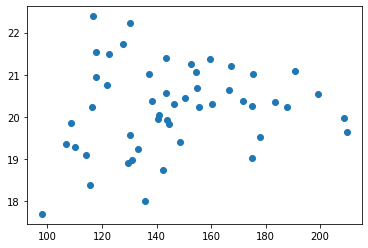

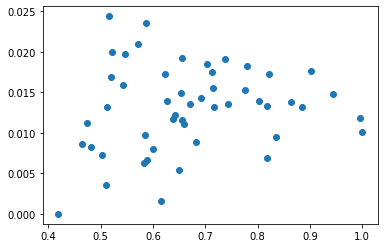

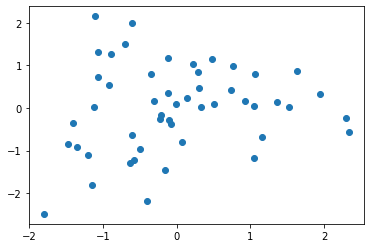

In [46]:
plt.scatter(dataset2[:,0], dataset2[:,1])
plt.show()

plt.scatter(normalisedData[:,0], normalisedData[:,1])
plt.show()

plt.scatter(newGuassNormArr[:,0],newGuassNormArr[:,1] )
plt.show()

---

## Exercise 3

Given training ($\texttt{y_true}$) and predicted ($\texttt{y_pred}$) data for binary classification, where 1 corresponds to the positive class and 0 corresponds to the negative class, compute
1. The number of True Positives, True Negatives, False Positives, False Negatives
2. Accuracy
3. Precision
4. Recall
5. F-score

In [10]:
y_true = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [11]:
def generateConfusionMatrix(y_true, y_pred):
  TP = 0
  FP = 0
  FN = 0
  TN = 0

  for index in range(len(y_pred)):
    if(y_pred[index] == y_true[index] == 1):
      TP += 1
    elif(y_pred[index] == 1 and y_true[index] != y_pred[index]):
      FP += 1
    elif(y_pred[index] == 0 and y_true[index] != y_pred[index]):
      FN += 1
    elif(y_pred[index] == y_true[index] == 0):
      TN += 1
  
  return np.array([[TP, FP], [FN, TN]])

confusionMatrix = generateConfusionMatrix(y_true, y_pred)
TP = confusionMatrix[0][0]
FP = confusionMatrix[0][1]
FN = confusionMatrix[1][0]
TN = confusionMatrix[1][1]

N  = np.shape(y_true)
accuracy = (y_true == y_pred).sum() / N
TrueP = ((y_pred == 1) & (y_true == 1)).sum()
FalseP = ((y_pred == 1) & (y_true == 0)).sum()
FalseN = ((y_pred == 0) & (y_true == 1)).sum()
TrueN = ((y_pred == 1) & (y_true == 1)).sum()

precision = TP / (TP+FP)
recall = TP / (TP+FN)
f_score = (2 * precision * recall) / (precision + recall)

precision1 = TrueP / (TrueP+FalseP)
recall1 = TrueP / (TrueP+FalseN)
f_score1 = (2 * precision1 * recall1) / (precision1 + recall1)

# print(precision)
# print(precision1)
# print(recall)
# print(recall1)
# print(f_score)
# print(f_score1)



---

## Exercise 4

Given training and predicted data for 4-class classification, where classes are 0,1,2,3

In [15]:
y_true = np.array([1, 2, 3, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 1, 0, 3, 1, 2, 0, 0, 1,3, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 2, 0, 3, 3, 3, 2, 0, 1, 3, 0, 1,3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2, 2, 1, 1,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 1, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2,2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 1, 1, 2, 2, 3, 0, 1, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 2, 2, 3, 3, 1, 3,1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 2, 1, 3,1, 0])
y_pred = np.array([1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 3, 0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 3, 1, 0, 0, 1, 3, 1, 0, 1,3, 3, 3, 3, 3, 1, 3, 1, 2, 2, 0, 2, 0, 3, 3, 3, 0, 2, 2, 3, 2, 2,3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 2, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 2, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 0, 3, 2, 2, 0, 3, 3, 3, 2, 1, 2, 3,2, 0, 2, 0, 0, 3, 0, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 2, 3, 3, 2, 3,1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 3, 1, 3,1, 0])

1. Compute the confusion matrix, i.e. a 4x4 matrix $\overline{A}$, in which an element $\overline{A}_{i,j}$ contains the number of elements that were predicted to be in class $i$, while their true class is $j$

In [16]:
# from sklearn.metrics import confusion_matrix as cm

# confMat = cm(y_true, y_pred)
# print(confMat)

def comp_confmat(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

confMat = comp_confmat(y_true, y_pred)
print(confMat)

[[40. 10.  4.  2.]
 [ 1. 30. 12.  0.]
 [ 3.  3. 36. 11.]
 [ 6.  2.  1. 39.]]


2. Compute Precision, Recall, F-score for every class, and compute the macro F-score

In [17]:
def getTP(confusionMatrix, clazz):
  return confusionMatrix[clazz][clazz]

def getFP(confusionMatrix, clazz):
  col = np.shape(confusionMatrix)[1]
  sum = 0

  for i in range(col):
    if(i != clazz):
      sum += confusionMatrix[clazz][i]
  
  return sum

def getFN(confusionMatrix, clazz):
  col = np.shape(confusionMatrix)[1]
  sum = 0

  for i in range(col):
    if(i != clazz):
      sum += confusionMatrix[i][clazz]
  
  return sum

def getTN(confusionMatrix, clazz):
  col = np.shape(confusionMatrix)[1]
  sum = 0

  for i in range(col):
    for j in range(col):
      if(i != clazz and j != clazz):
        sum += confusionMatrix[i][j]
  
  return sum

class0Acc = (getTP(confMat, 0)+ getTN(confMat, 0))/np.sum(confMat)
class0Prec = getTP(confMat, 0)/(getTP(confMat, 0)+ getFP(confMat, 0))
class0Recall = getTP(confMat, 0)/(getTP(confMat, 0)+getFN(confMat, 0))
class0f1Score = 2*class0Prec*class0Recall/(class0Recall+class0Prec)

class1Acc = (getTP(confMat, 1)+ getTN(confMat, 1))/np.sum(confMat)
class1Prec = getTP(confMat, 1)/(getTP(confMat, 1)+ getFP(confMat, 1))
class1Recall = getTP(confMat, 1)/(getTP(confMat, 1)+getFN(confMat, 1))
class1f1Score = 2*class0Prec*class0Recall/(class0Recall+class0Prec)

class2Acc = (getTP(confMat, 2)+ getTN(confMat, 2))/np.sum(confMat)
class2Prec = getTP(confMat, 2)/(getTP(confMat, 2)+ getFP(confMat, 2))
class2Recall = getTP(confMat, 2)/(getTP(confMat, 2)+getFN(confMat, 2))
class2f1Score = 2*class0Prec*class0Recall/(class0Recall+class0Prec)

class3Acc = (getTP(confMat, 3)+ getTN(confMat, 3))/np.sum(confMat)
class3Prec = getTP(confMat, 3)/(getTP(confMat, 3)+ getFP(confMat, 3))
class3Recall = getTP(confMat, 3)/(getTP(confMat, 3)+getFN(confMat, 3))
class3f1Score = 2*class0Prec*class0Recall/(class0Recall+class0Prec)

macroF1Score = (class0f1Score+class1f1Score+class2f1Score+class3f1Score)/4
print(macroF1Score)


0.7547169811320756
